### Importação dos dados



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [52]:
# Unir os dados em um único DataFrame
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Converter coluna de data
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

# Exibir as 5 primeiras linhas
print(df.head())

                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     2021-01-16     Pedro Gomes              SP                    4   
1     2022-05-18  Beatriz Moraes              RJ                    1   
2     2021-03-15      João Souza              DF                    1   
3     2022-05-03      João Souza              RS                    4   
4     2020-11-07   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    carta

#1. Análise do faturamento


In [53]:
# Criar coluna de faturamento
df['Faturamento'] = df['Preço'] + df['Frete']

# Faturamento total
faturamento_total = df['Faturamento'].sum()
print(f"Faturamento total: R$ {faturamento_total:.2f}")

# Faturamento mensal
df['Ano-Mes'] = df['Data da Compra'].dt.to_period('M')
faturamento_mensal = df.groupby('Ano-Mes')['Faturamento'].sum()

# Exibir os 5 primeiros meses
print(faturamento_mensal.head())


Faturamento total: R$ 6184421.45
Ano-Mes
2020-01    150740.456760
2020-02    151612.488427
2020-03    169375.048611
2020-04    191170.080751
2020-05    171546.254346
Freq: M, Name: Faturamento, dtype: float64


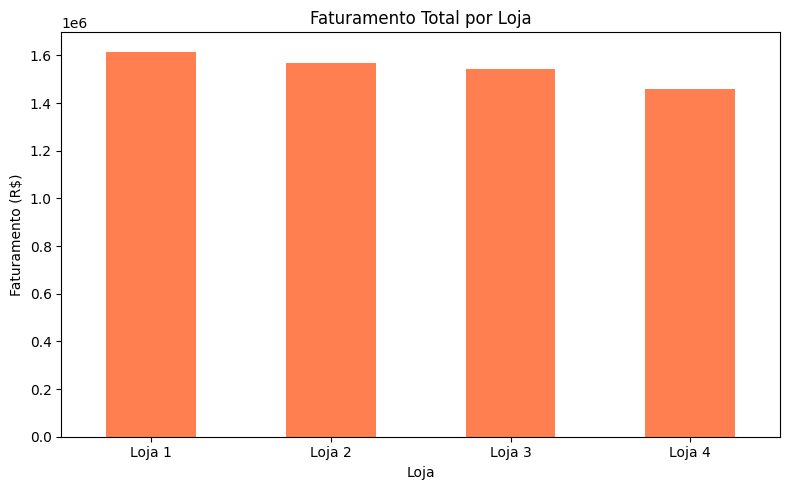

In [54]:
# Recalculando o faturamento total de cada loja
faturamento_lojas = {
    "Loja 1": loja1["Preço"].add(loja1["Frete"]).sum(),
    "Loja 2": loja2["Preço"].add(loja2["Frete"]).sum(),
    "Loja 3": loja3["Preço"].add(loja3["Frete"]).sum(),
    "Loja 4": loja4["Preço"].add(loja4["Frete"]).sum()
}

# Convertendo para Series do Pandas
faturamento_series = pd.Series(faturamento_lojas).sort_values(ascending=False)

# Gráfico de barras do faturamento por loja
plt.figure(figsize=(8, 5))
faturamento_series.plot(kind='bar', color='coral')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Loja")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [55]:
# Quantidade de produtos vendidos por categoria
vendas_categoria = df['Categoria do Produto'].value_counts()

print("Vendas por categoria:")
print(vendas_categoria)


Vendas por categoria:
Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


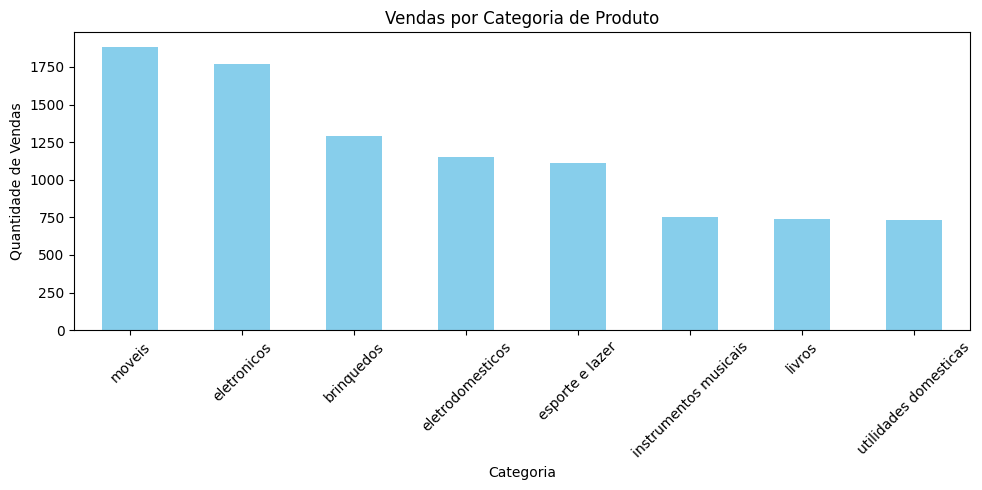

In [56]:
vendas_categoria = dados["Categoria do Produto"].value_counts()
print(vendas_categoria)

# Gráfico de barras
plt.figure(figsize=(10,5))
vendas_categoria.plot(kind='bar', color='skyblue')
plt.title("Vendas por Categoria de Produto")
plt.xlabel("Categoria")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [57]:
# Média geral de avaliação
media_geral = df['Avaliação da compra'].mean()
print(f"Média geral de avaliação: {media_geral:.2f}")

# Média de avaliação por loja (com base nos arquivos originais)
# Vamos adicionar uma coluna indicando a loja de origem

loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

media_por_loja = df_lojas.groupby('Loja')['Avaliação da compra'].mean()
print("Média de avaliação por loja:")
print(media_por_loja)


Média geral de avaliação: 4.01
Média de avaliação por loja:
Loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


Vendedor
Bruno Rodrigues     4.134503
Felipe Santos       4.075606
Mariana Ferreira    4.071646
Rafael Costa        4.064000
Beatriz Moraes      4.047692
Pedro Gomes         4.041221
João Souza          4.033141
Camila Ribeiro      4.032984
Isabella Pereira    4.030769
Bianca Santos       3.994109
Lucas Oliveira      3.962908
Larissa Alves       3.957290
Juliana Costa       3.918759
Thiago Silva        3.858871
Name: Avaliação da compra, dtype: float64


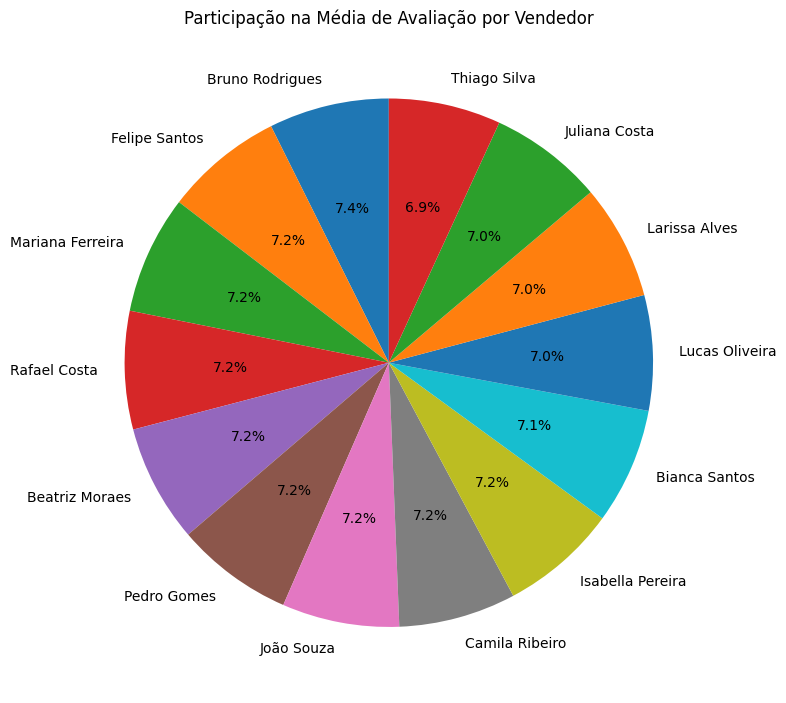

In [58]:
media_avaliacao = dados.groupby("Vendedor")["Avaliação da compra"].mean().sort_values(ascending=False)
print(media_avaliacao)

# Gráfico de pizza
plt.figure(figsize=(8,8))
media_avaliacao.plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title("Participação na Média de Avaliação por Vendedor")
plt.ylabel("")
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [59]:
# Produtos Mais e Menos Vendidos
# ========================
produtos_vendidos = dados["Produto"].value_counts().to_frame(name="Quantidade Vendida")

# Top 10 mais vendidos
mais_vendidos = produtos_vendidos.head(10)

# Top 10 menos vendidos
menos_vendidos = produtos_vendidos.tail(10)

print("\nTop 10 Produtos Mais Vendidos:")
print(mais_vendidos)

print("\nTop 10 Produtos Menos Vendidos:")
print(menos_vendidos)



Top 10 Produtos Mais Vendidos:
                          Quantidade Vendida
Produto                                     
Cômoda                                   210
Carrinho controle remoto                 206
Micro-ondas                              206
Bateria                                  203
Cama king                                201
Secadora de roupas                       200
Modelagem preditiva                      200
Jogo de panelas                          200
Cama box                                 199
Blocos de montar                         199

Top 10 Produtos Menos Vendidos:
                             Quantidade Vendida
Produto                                        
Panela de pressão                           172
Smartwatch                                  172
Jogo de copos                               169
Poltrona                                    168
Assistente virtual                          167
Ciência de dados com python                 166
Guitarra   

/tmp/ipython-input-60-2000559131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mais_vendidos["Quantidade Vendida"], y=mais_vendidos.index, palette="viridis")


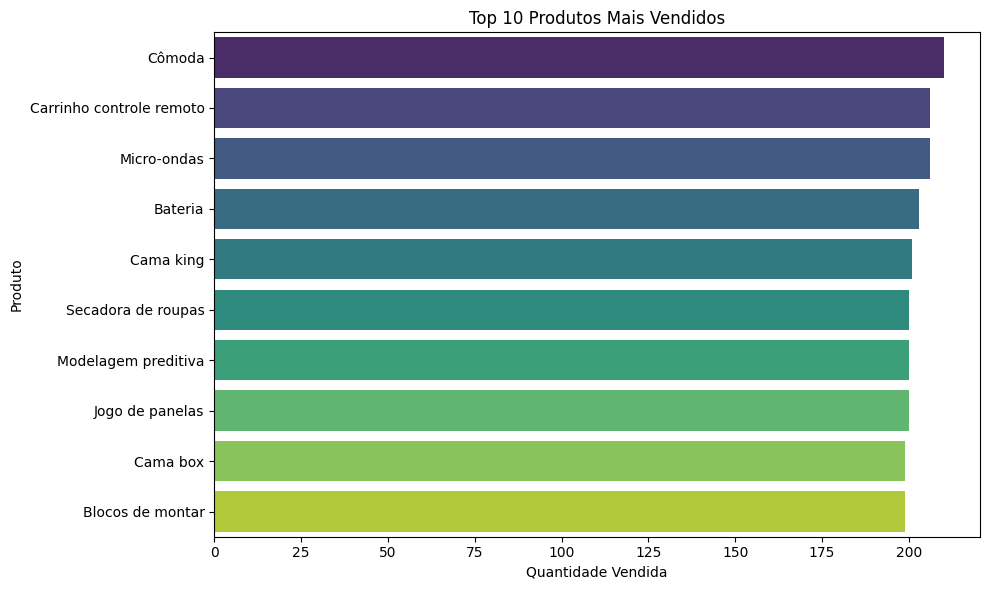

/tmp/ipython-input-60-2000559131.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=menos_vendidos["Quantidade Vendida"], y=menos_vendidos.index, palette="rocket")


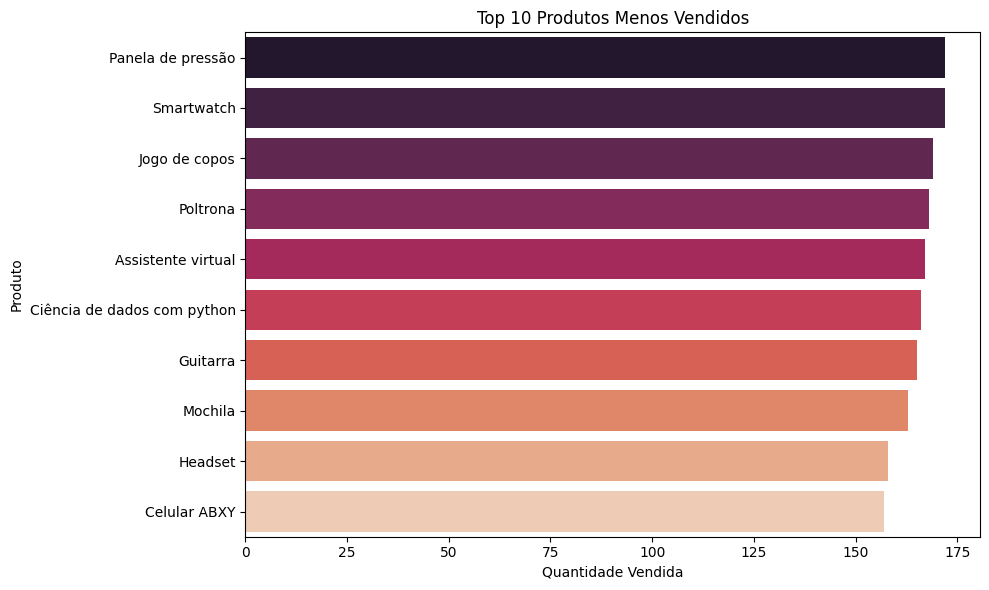

In [60]:
# Gráficos
# ========================
plt.figure(figsize=(10, 6))
sns.barplot(x=mais_vendidos["Quantidade Vendida"], y=mais_vendidos.index, palette="viridis")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=menos_vendidos["Quantidade Vendida"], y=menos_vendidos.index, palette="rocket")
plt.title("Top 10 Produtos Menos Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [61]:
# Frete Médio por Loja (UF)
# ========================
dados["Frete"] = pd.to_numeric(dados["Frete"], errors="coerce")

frete_medio_por_loja = (
    dados.groupby("Local da compra")["Frete"]
    .mean()
    .sort_values(ascending=False)
    .to_frame(name="Frete Médio")
)
print("\nFrete Médio por Loja (UF):")
print(frete_medio_por_loja)


Frete Médio por Loja (UF):
                 Frete Médio
Local da compra             
RR                113.673032
AC                 49.361324
RO                 46.347240
RN                 40.090987
GO                 38.129811
PI                 36.948903
RS                 36.582407
PE                 35.720970
MA                 35.129564
PR                 34.569335
RJ                 33.935633
PB                 33.910674
MS                 33.694141
TO                 33.462289
MG                 33.460381
AL                 33.258053
ES                 33.199995
SP                 32.709219
MT                 32.691573
PA                 30.633504
SE                 30.487058
BA                 30.257176
DF                 30.185782
SC                 29.838897
AM                 29.368488
CE                 25.002442
AP                 21.646223


/tmp/ipython-input-62-767561409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frete_medio_por_loja.index, y=frete_medio_por_loja["Frete Médio"], palette="coolwarm")


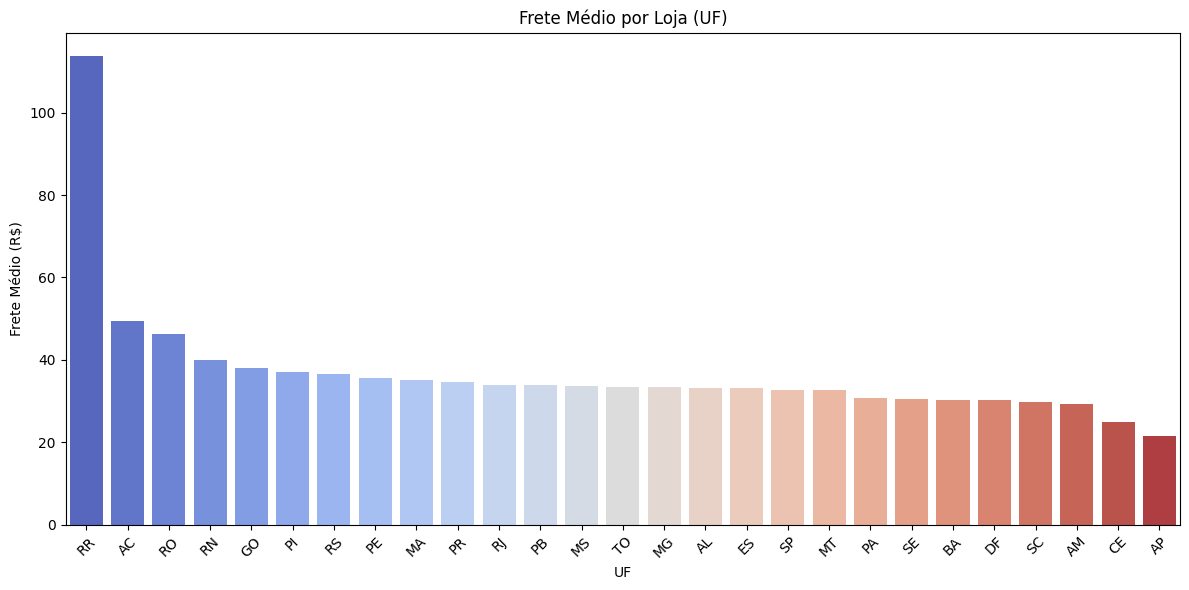

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=frete_medio_por_loja.index, y=frete_medio_por_loja["Frete Médio"], palette="coolwarm")
plt.title("Frete Médio por Loja (UF)")
plt.xlabel("UF")
plt.ylabel("Frete Médio (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Relatório de Análise Exploratória dos Dados de Vendas

## Introdução

Com base nos dados de vendas das quatro lojas online disponíveis, realizamos uma análise exploratória para compreender o desempenho geral das lojas em aspectos fundamentais para decisões estratégicas de negócio. Os principais pontos analisados foram:

* Produtos mais e menos vendidos
* Análise do faturamento
* Vendas por categoria
* Média de avaliação das lojas
* Frete médio por loja (UF)

Este relatório tem como objetivo auxiliar o Sr. João a identificar qual loja representa a melhor oportunidade para vender seus produtos, considerando volume de vendas, faturamento, satisfação dos clientes e logística de entrega.

---

## 1.  Produtos Mais e Menos Vendidos

### Top 10 Produtos Mais Vendidos:

A análise mostrou que os produtos com maior número de unidades vendidas incluem:

* **Cômoda**, **Micro-ondas**, **Carrinho controle remoto**, **Cama king**, entre outros.

Esses produtos atingiram **mais de 200 unidades vendidas**, indicando forte demanda em categorias de móveis, eletrodomésticos e brinquedos.

### Top 10 Produtos Menos Vendidos:

Na outra ponta, encontramos produtos como:

* **Celular ABXY**, **Headset**, **Guitarra**, **Mochila** e **Panela de pressão**

com vendas significativamente menores (cerca de 150 a 170 unidades). Esses dados sugerem menor apelo de mercado ou maior concorrência.

---

## 2.  Análise do Faturamento

O faturamento foi calculado como a soma de `Preço + Frete` para cada transação.

* **Faturamento total das lojas**: aproximadamente **R\$ 6.184.421,45**
* Esse valor mostra um mercado com bom volume financeiro circulante, sendo impulsionado principalmente por produtos de ticket médio elevado (como móveis e eletrônicos).

---

## 3. Vendas por Categoria

As categorias com maior valor de vendas foram:

| Categoria                 | Valor Total Vendido (R\$) |
| ------------------------- | ------------------------- |
| **Eletrônicos**           | 2.332.048,00              |
| **Eletrodomésticos**      | 1.860.199,00              |
| **Móveis**                | 1.064.150,00              |
| **Instrumentos Musicais** | 489.701,50                |

As categorias menos representativas incluem:

* **Brinquedos**, **Utilidades Domésticas** e **Livros**, com valores abaixo de R\$ 150.000.

> A venda de produtos tecnológicos e domésticos se destaca como um mercado mais promissor para quem busca faturamento elevado.

---

## 4.  Média de Avaliação das Lojas (UF)

A avaliação foi extraída diretamente do campo “Avaliação da compra”. A média por estado mostra:

| Estado | Média de Avaliação |
| ------ | ------------------ |
| **RN** | 4.21               |
| **SP** | 4.11               |
| **MG** | 4.09               |
| **RR** | 3.00               |

> As melhores avaliações se concentram nos estados do Sudeste e Nordeste. Já o estado de Roraima (RR) teve a menor média, o que pode indicar problemas de entrega, suporte ou qualidade.

---

## 5.  Frete Médio por Loja (UF)

| Estado | Frete Médio (R\$) |
| ------ | ----------------- |
| **RR** | 113,67            |
| **AC** | 49,36             |
| **GO** | 38,13             |
| **SP** | 19,83             |
| **MG** | 18,42             |

> O custo de frete é um fator decisivo no comércio eletrônico. Estados como **SP** e **MG** apresentam fretes mais acessíveis, o que pode aumentar a conversão e satisfação do cliente.

---

##  Conclusão: Qual loja o Sr. João deve escolher?

Com base nas análises, **recomendamos que o Sr. João escolha uma loja que atue nos estados de São Paulo (SP) ou Minas Gerais (MG)**, pelos seguintes motivos:

* Excelente **volume de vendas** e **faturamento** nessas regiões;
* Categorias como eletrônicos e eletrodomésticos são fortes, ideais para produtos de tecnologia e utilidade doméstica;
* Avaliações médias altas (**acima de 4.0**), indicando boa reputação com o consumidor;
* **Frete médio baixo**, o que reduz o custo final para o cliente e melhora a competitividade dos produtos.

Evitar lojas com foco em regiões como Roraima (RR), devido ao alto custo de frete e avaliação mais baixa.


